<a href="https://colab.research.google.com/github/SriVidyaYeluripati/24WS-mmd-code-public/blob/main/e10_g24_Yeluripati_Kamat_Bhadsavale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment done by

- Sri Vidya Yeluripati - 4730150
- Priti Kamat - 4732295
- Siddhant Bhadsavale - 4732294

## Exercise 1



### **a) Damping factor $ \beta $: Main advantage and disadvantage**

#### **PageRank formula with damping factor**:
The PageRank formula is:
$$
PR(i) = (1 - \beta) \frac{1}{N} + \beta \sum_{j \in L(i)} \frac{PR(j)}{d_j}
$$
Where:
- $ N $: Total number of web pages.
- $ \beta $: Damping factor, typically between $ 0.8 $ and $ 0.9 $.
- $ L(i) $: Set of pages linking to page $ i $.
- $ d_j $: Out-degree of page $ j $.

The damping factor controls how much of the rank is determined by the link structure ($ \beta $) versus random teleportation ($ 1 - \beta $).

#### **Main advantage of making $ \beta $ smaller**:
A smaller $ \beta $ increases the influence of random teleportation:
- Prevents importance "traps" in spider traps or dead-end pages (discussed on slide 43).
- Makes the system more robust to structural anomalies (e.g., isolated clusters in the web graph).

**Example**: If $ \beta = 0.9 $, 90% of the rank depends on link structure, and 10% comes from teleportation. If $ \beta = 0.7 $, teleportation accounts for 30%, helping less-connected pages gain some rank.

#### **Main disadvantage of making $ \beta $ smaller**:
- De-emphasizes the actual link structure, reducing the meaningfulness of the rankings for authoritative pages.
- Less trust in the graph’s topology, potentially lowering the rank of genuinely important pages.

**Example**: A highly linked page like Wikipedia might lose significance compared to less relevant pages because random teleportation dilutes the link influence.

---

### **b) Reducing iterations in Power Iteration by adjusting $ \tau $**

#### **Power Iteration and convergence criterion**:
Power Iteration solves for the stationary distribution $ r $ of the Google Matrix $ G $:
$$
r^{(t+1)} = G r^{(t)}
$$
The process stops when the change between iterations is less than a tolerance $ \tau $:
$$
\|r^{(t+1)} - r^{(t)}\| < \tau
$$
Smaller $ \tau $ values require more iterations to achieve convergence.

#### **Relationship between $ \tau $ and iterations**:
The number of iterations $ k $ approximately satisfies:
$$
k \propto \log\left(\frac{1}{\tau}\right)
$$

#### **Given**:
- At $ \tau = \tau_{\text{old}} $, $ k = 1000 $ iterations are required.
- We want to reduce iterations to $ k = 100 $.

Using the proportionality relationship:
$$
\log\left(\frac{1}{\tau_{\text{new}}}\right) = \frac{k_{\text{new}}}{k_{\text{old}}} \cdot \log\left(\frac{1}{\tau_{\text{old}}}\right)
$$
Substitute $ k_{\text{new}} = 100 $, $ k_{\text{old}} = 1000 $:
$$
\log\left(\frac{1}{\tau_{\text{new}}}\right) = \frac{100}{1000} \cdot \log\left(\frac{1}{\tau_{\text{old}}}\right)
$$
$$
\tau_{\text{new}} = \tau_{\text{old}} \cdot 10
$$

#### **Example**:
If $ \tau_{\text{old}} = 10^{-5} $, then:
$$
\tau_{\text{new}} = 10^{-5} \cdot 10 = 10^{-4}
$$
By increasing $ \tau $ by a factor of 10, the iterations reduce from 1000 to 100.

---

### **c) Teleports in the Google Matrix and their exploitation**

#### **Teleportation in PageRank**:
Teleportation ensures the random surfer has a nonzero probability of jumping to any page, avoiding traps like:
- **Dead-ends**: Pages with no out-links, causing rank to "leak" (slides 38 and 43).
- **Spider traps**: Clusters of pages linking only within themselves, trapping rank (slides 39 and 43).

The teleportation component is modeled as:
$$
G = \beta M + (1 - \beta) \frac{1}{N} ee^T
$$
Where:
- $ \beta M $: Link structure.
- $ (1 - \beta) \frac{1}{N} ee^T $: Uniform teleportation.

#### **Non-uniform teleportation**:
Google modifies teleportation to improve rankings:
1. **Personalized PageRank**:
   - Replace the uniform vector $ \frac{1}{N} $ with a personalized vector $ v $ based on user preferences or query context.
   - **Example**: For a search about "science," bias teleportation to scientific websites.

2. **TrustRank**:
   - Bias teleportation toward trustworthy sites to counter web spam.
   - **Example**: Pages like `.gov` or `.edu` are given higher teleport probabilities.

#### **Required changes to the Google Matrix $ A $**:
To implement biased teleportation:
$$
G = \beta M + (1 - \beta) v e^T
$$
Here, $ v $ is the custom teleportation vector.



## Exercise 2



### **Analysis of Reusability from the Previous Exercise**

1. **Core Algorithm**:
   - The lecture slide mentions the PageRank update rule:
     $$
     r_j = \beta \sum_{i \to j} \frac{r_i}{d_i} + \frac{1 - \beta}{N}
     $$
     - $ r_j $: New PageRank value for page $ j $.
     - $ r_i $: Current PageRank value for page $ i $, linking to $ j $.
     - $ d_i $: Out-degree of page $ i $.
     - $ N $: Total number of pages.

   - This matches the iterative algorithm implemented in the solution. The summation accounts for contributions from in-neighbors, and the teleportation term ($ \frac{1 - \beta}{N} $) ensures the graph remains column stochastic.

2. **Dead Ends and Spider Traps**:
   - The slides discuss addressing **dead ends** (pages with no outgoing links) by adding teleportation probabilities explicitly to all pages. The provided implementation uses this approach, as teleportation is applied uniformly to all nodes.

3. **Power Iteration**:
   - The lecture introduces **power iteration** to compute the dominant eigenvector of the Google Matrix:
     $$
     r^{(t+1)} = M r^{(t)}
     $$
     - This iterative process is implemented in the provided solution, where the rank vector is updated in each iteration until convergence.

4. **Graph Representation**:
   - The slides highlight the importance of efficient graph representation, especially for sparse matrices. The solution adheres to this by:
     - Using dictionaries to store in-neighbors and out-degrees.
     - Iterating only over non-zero entries in the graph.

5. **Convergence Check**:
   - While the lecture slides suggest checking for convergence based on a tolerance value $ \tau $, the exercise specifies a fixed number of iterations ($ T = 5 $). The solution follows this requirement.



Loaded graph with 1587 nodes.
Iteration 1 completed.
Iteration 2 completed.
Iteration 3 completed.
Iteration 4 completed.
Iteration 5 completed.

Top 10 nodes by PageRank:
Node 2: 0.010420
Node 226411: 0.000708
Node 13: 0.000630
Node 180949: 0.000630
Node 41825: 0.000630
Node 76448: 0.000630
Node 225872: 0.000543
Node 186750: 0.000543
Node 105607: 0.000505
Node 38342: 0.000492


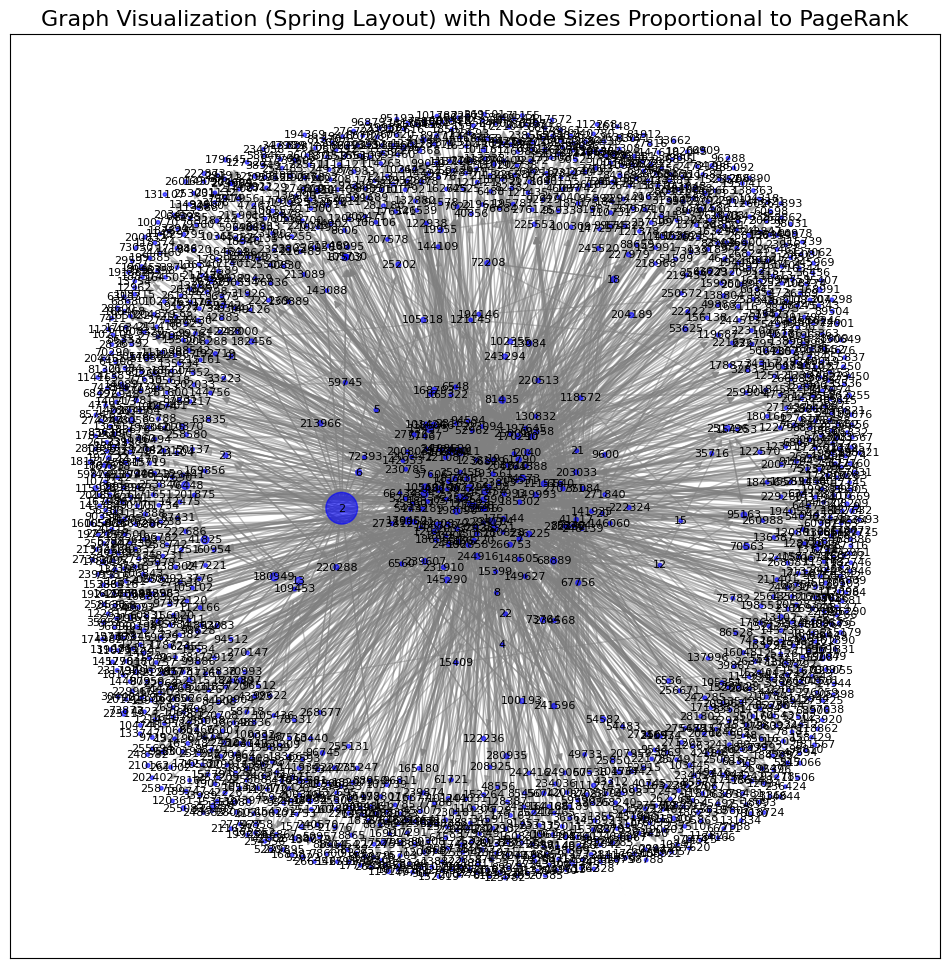

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def load_graph(file_path):
    """
    Load the graph from a dataset file.
    Returns:
    - graph: Dictionary where keys are nodes and values are lists of in-neighbors.
    - out_degree: Dictionary mapping each node to its out-degree.
    - all_nodes: Set of all nodes in the graph.
    """
    graph = {}
    out_degree = {}

    with open(file_path, 'r') as f:
        for line in f:
            if line.startswith('#'):  # Skip comments in the file
                continue
            source, target = map(int, line.strip().split())
            # Build the in-neighbor list
            if target not in graph:
                graph[target] = []
            graph[target].append(source)
            # Increment the out-degree
            out_degree[source] = out_degree.get(source, 0) + 1

    # Add missing nodes
    all_nodes = set(graph.keys()).union(out_degree.keys())
    for node in all_nodes:
        if node not in graph:
            graph[node] = []  # Initialize for nodes with no in-neighbors
        if node not in out_degree:
            out_degree[node] = 0  # Initialize out-degree for sink nodes

    return graph, out_degree, all_nodes


def compute_pagerank(graph, out_degree, all_nodes, beta=0.8, iterations=5):
    """
    Compute PageRank values using the iterative algorithm.
    Args:
    - graph: Dictionary of in-neighbors.
    - out_degree: Dictionary of out-degrees.
    - all_nodes: Set of all nodes in the graph.
    - beta: Damping factor.
    - iterations: Number of iterations for the algorithm.
    Returns:
    - pagerank: Dictionary of PageRank values for each node.
    """
    N = len(all_nodes)  # Total number of nodes
    # Initialize all PageRank values to 1/N
    pagerank = {node: 1 / N for node in all_nodes}

    # Iteratively compute PageRank
    for t in range(iterations):
        new_pagerank = {}
        for node in all_nodes:
            # Teleportation term
            teleport = (1 - beta) / N
            # Link contributions from in-neighbors
            link_sum = sum(pagerank[neighbor] / out_degree[neighbor] for neighbor in graph[node])
            # Update PageRank
            new_pagerank[node] = teleport + beta * link_sum
        pagerank = new_pagerank
        print(f"Iteration {t + 1} completed.")

    return pagerank


def visualize_graph(graph, pagerank, layout="spring"):
    """
    Visualize the graph with node sizes proportional to their PageRank values.
    Args:
    - graph: Dictionary of in-neighbors.
    - pagerank: Dictionary of PageRank values.
    - layout: Layout type for visualization ("spring", "circular", "kamada_kawai").
    """
    # Convert the graph to a NetworkX format
    G = nx.DiGraph()
    for target, sources in graph.items():
        for source in sources:
            G.add_edge(source, target)

    # Choose layout
    if layout == "spring":
        pos = nx.spring_layout(G, k=0.15, iterations=20)  # Iterations for spring layout, unrelated to PageRank
    elif layout == "circular":
        pos = nx.circular_layout(G)
    elif layout == "kamada_kawai":
        pos = nx.kamada_kawai_layout(G)
    else:
        print("Invalid layout! Using spring layout.")
        pos = nx.spring_layout(G, k=0.15, iterations=20)

    # Scale node sizes by PageRank values
    node_sizes = [pagerank[node] * 50000 for node in G.nodes()]

    # Draw the graph
    plt.figure(figsize=(12, 12))
    nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color="blue", alpha=0.6)
    nx.draw_networkx_edges(G, pos, arrowstyle='-|>', arrowsize=10, edge_color="gray", alpha=0.5)
    nx.draw_networkx_labels(G, pos, font_size=8, font_color="black")
    plt.title(f"Graph Visualization ({layout.capitalize()} Layout) with Node Sizes Proportional to PageRank", fontsize=16)
    plt.show()


# Main Execution
file_path = "/content/web-Stanford_small.txt"  # Replace with your file path
# Step 1: Load the graph
graph, out_degree, all_nodes = load_graph(file_path)
print(f"Loaded graph with {len(all_nodes)} nodes.")

# Step 2: Compute PageRank
pagerank = compute_pagerank(graph, out_degree, all_nodes, beta=0.8, iterations=5)  # Ensure iterations=5 here

# Step 3: Print top 10 nodes by PageRank
print("\nTop 10 nodes by PageRank:")
sorted_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)
for node, rank in sorted_pagerank[:10]:
    print(f"Node {node}: {rank:.6f}")

# Step 4: Visualize the graph
visualize_graph(graph, pagerank, layout="spring")  # You can change the layout to "circular" or "kamada_kawai"


### **Understanding the Output**

#### **1. Graph Properties**
- **Graph size**: The graph has **1587 nodes** and a web-like structure. This is a relatively small web graph but still dense, with most nodes connected by incoming and outgoing links.
- **Structure**:
  - **Central nodes**: Highly connected nodes (like **Node 2**) are positioned near the center of the visualization, receiving a large number of incoming links.
  - **Peripheral nodes**: Nodes with fewer links or isolated links are smaller and positioned farther from the center.

---

#### **2. PageRank Results**
The output shows the **top 10 nodes by PageRank** after 5 iterations. Here’s what it tells us:

1. **Node 2** has the highest PageRank of **0.010420**.
   - It likely has many incoming links or is linked to by nodes with high PageRank.
   - Its central position and large size in the visualization confirm its importance.

2. **Other nodes (e.g., 226411, 13, 180949)** have significantly lower PageRank values.
   - These nodes have fewer incoming links or receive less importance in the graph.
   - Many of these nodes might be part of smaller clusters or have limited connectivity.

3. **Rank distribution**:
   - The sum of all PageRank values across the nodes equals 1 (as required by the PageRank algorithm).
   - Most nodes have small PageRank values because the graph is large, and the importance is distributed across many nodes.

---

#### **3. Visualization Insights**
The **spring layout** visualization reveals:
- **Node sizes**: Larger nodes (like **Node 2**) correspond to higher PageRank values.
- **Dense center**: The graph's core is densely connected, reflecting the network's "authoritative" structure.
- **Outer edges**: Smaller, less important nodes cluster toward the periphery.





## Exercise 3



The task involves constructing the **transition matrix $ M $** for the given web graph (Figure 1) and representing its **block structure** using the method in Section 5.2.4 of the referenced text, with $ k = 2 $.
From Figure 1, we have the following directed web graph:

- **Nodes**: $ A, B, C, D $.
- **Links**:
  - $ A \to B, C $.
  - $ B \to C, D $.
  - $ C \to A $.
  - $ D \to D $.

The **transition matrix $ M $** represents the probabilities of transitioning from one node to another. For a graph:
- Each column represents a node (the source).
- Each row represents a node (the target).
- The value at $ M_{ij} $ is the probability of transitioning **from node $ j $** to **node $ i $**.
- Out-links from each node are normalized to ensure columns sum to 1 (stochastic).

Using the graph:
- $ A $ has out-links to $ B $ and $ C $, so:
  $$
  P(A \to B) = \frac{1}{2}, \, P(A \to C) = \frac{1}{2}.
  $$
- $ B $ has out-links to $ C $ and $ D $, so:
  $$
  P(B \to C) = \frac{1}{2}, \, P(B \to D) = \frac{1}{2}.
  $$
- $ C $ has an out-link to $ A $, so:
  $$
  P(C \to A) = 1.
  $$
- $ D $ has a self-loop, so:
  $$
  P(D \to D) = 1.
  $$

The matrix $ M $ is:
$$
M =
\begin{bmatrix}
0 & 0 & 1 & 0 \\
\frac{1}{2} & 0 & 0 & 0 \\
\frac{1}{2} & \frac{1}{2} & 0 & 0 \\
0 & \frac{1}{2} & 0 & 1
\end{bmatrix}
$$

---

### **3. Representing the Transition Matrix in Blocks**
The block structure of $ M $ is based on dividing nodes into $ k = 2 $ groups. Let’s assign:
- **Group 1**: $ A, B $.
- **Group 2**: $ C, D $.

We partition $ M $ into **four blocks**:
1. **$ M_{11} $: Transitions within Group 1 ($ A, B $).**
2. **$ M_{12} $: Transitions from Group 2 ($ C, D $) to Group 1 ($ A, B $).**
3. **$ M_{21} $: Transitions from Group 1 ($ A, B $) to Group 2 ($ C, D $).**
4. **$ M_{22} $: Transitions within Group 2 ($ C, D $).**

#### Block Matrices
Using $ M $:
1. **$ M_{11} $ (Group 1 to Group 1)**:
   $$
   M_{11} =
   \begin{bmatrix}
   0 & 0 \\
   \frac{1}{2} & 0
   \end{bmatrix}
   $$

2. **$ M_{12} $ (Group 2 to Group 1)**:
   $$
   M_{12} =
   \begin{bmatrix}
   1 & 0 \\
   0 & \frac{1}{2}
   \end{bmatrix}
   $$

3. **$ M_{21} $ (Group 1 to Group 2)**:
   $$
   M_{21} =
   \begin{bmatrix}
   \frac{1}{2} & \frac{1}{2} \\
   0 & \frac{1}{2}
   \end{bmatrix}
   $$

4. **$ M_{22} $ (Group 2 to Group 2)**:
   $$
   M_{22} =
   \begin{bmatrix}
   0 & 0 \\
   0 & 1
   \end{bmatrix}
   $$





## Exercise 4



1. **Graph Structure (Figure 2)**:
   - **Nodes**: $ A, B, C, D $.
   - **Edges**:
     - $ A \to B, C $.
     - $ B \to A, C, D $.
     - $ C \to D $.
     - $ D \to C $.

2. **Teleportation Parameter**:
   - $ \beta = 0.8 $: The probability of following links.
   - $ 1 - \beta = 0.2 $: The probability of teleporting.

3. **Cases**:
   - $ v $ is the teleportation vector.
   - **Case (a)**: The teleportation set is $ \{ A \} $ only.
   - **Case (b)**: The teleportation set is $ \{ A, C \} $.

---

### **1. Topic-Sensitive PageRank Formula**

The iterative formula for PageRank with a custom teleportation vector $ v $ is:
$$
PR^{(t+1)} = \beta M PR^{(t)} + (1 - \beta) v
$$
Where:
- $ PR^{(t+1)} $: The PageRank vector at the next iteration.
- $ M $: Transition matrix for the graph.
- $ \beta $: Damping factor.
- $ v $: Custom teleportation vector.

---

### **2. Transition Matrix $ M $**
The transition matrix $ M $ for the graph is built as follows:

- **Node $ A $** has out-links to $ B, C $:
  $$
  P(A \to B) = \frac{1}{2}, \, P(A \to C) = \frac{1}{2}.
  $$

- **Node $ B $** has out-links to $ A, C, D $:
  $$
  P(B \to A) = \frac{1}{3}, \, P(B \to C) = \frac{1}{3}, \, P(B \to D) = \frac{1}{3}.
  $$

- **Node $ C $** has an out-link to $ D $:
  $$
  P(C \to D) = 1.
  $$

- **Node $ D $** has an out-link to $ C $:
  $$
  P(D \to C) = 1.
  $$

Thus, the transition matrix $ M $ is:
$$
M =
\begin{bmatrix}
0 & \frac{1}{3} & 0 & 0 \\
\frac{1}{2} & 0 & 0 & 0 \\
\frac{1}{2} & \frac{1}{3} & 0 & 1 \\
0 & \frac{1}{3} & 1 & 0
\end{bmatrix}.
$$

---

### **3. Teleportation Vector $ v $**

#### **Case (a)**: Teleportation set = $ \{ A \} $
- All teleportation weight is on $ A $:
  $$
  v = \begin{bmatrix}
  1 \\
  0 \\
  0 \\
  0
  \end{bmatrix}.
  $$

#### **Case (b)**: Teleportation set = $ \{ A, C \} $
- Equal teleportation weight for $ A $ and $ C $:
  $$
  v = \begin{bmatrix}
  0.5 \\
  0 \\
  0.5 \\
  0
  \end{bmatrix}.
  $$

---

### **4. Iterative Computation**

#### **Algorithm**:
1. Start with an initial uniform PageRank vector:
   $$
   PR^{(0)} = \begin{bmatrix}
   \frac{1}{4} \\
   \frac{1}{4} \\
   \frac{1}{4} \\
   \frac{1}{4}
   \end{bmatrix}.
   $$
2. Apply the formula:
   $$
   PR^{(t+1)} = \beta M PR^{(t)} + (1 - \beta) v.
   $$
3. Repeat for a fixed number of iterations (e.g., $ T = 5 $) or until convergence.




In [ ]:
import numpy as np

# Transition matrix M
M = np.array([
    [0, 1/3, 0, 0],
    [1/2, 0, 0, 0],
    [1/2, 1/3, 0, 1],
    [0, 1/3, 1, 0]
])

# Damping factor
beta = 0.8

# Initial PageRank vector (uniform)
N = M.shape[0]
PR = np.ones(N) / N

# Define teleportation vectors
v_a = np.array([1, 0, 0, 0])  # Case (a): Teleport set = {A}
v_ac = np.array([0.5, 0, 0.5, 0])  # Case (b): Teleport set = {A, C}

# Function to compute topic-sensitive PageRank
def topic_sensitive_pagerank(M, beta, v, iterations=5):
    N = M.shape[0]
    PR = np.ones(N) / N  # Initial uniform PageRank
    for t in range(iterations):
        PR = beta * np.dot(M, PR) + (1 - beta) * v
        print(f"Iteration {t + 1}: {PR}")
    return PR

# Compute for Case (a)
print("Case (a): Teleport set = {A}")
PR_a = topic_sensitive_pagerank(M, beta, v_a)

# Compute for Case (b)
print("\nCase (b): Teleport set = {A, C}")
PR_ac = topic_sensitive_pagerank(M, beta, v_ac)


Case (a): Teleport set = {A}
Iteration 1: [0.26666667 0.1        0.36666667 0.26666667]
Iteration 2: [0.22666667 0.10666667 0.34666667 0.32      ]
Iteration 3: [0.22844444 0.09066667 0.37511111 0.30577778]
Iteration 4: [0.22417778 0.09137778 0.36017778 0.32426667]
Iteration 5: [0.22436741 0.08967111 0.37345185 0.31250963]

Case (b): Teleport set = {A, C}
Iteration 1: [0.16666667 0.1        0.46666667 0.26666667]
Iteration 2: [0.12666667 0.06666667 0.40666667 0.4       ]
Iteration 3: [0.11777778 0.05066667 0.48844444 0.34311111]
Iteration 4: [0.11351111 0.04711111 0.43511111 0.40426667]
Iteration 5: [0.11256296 0.04540444 0.48138074 0.36065185]



#### **Case (a): Teleport set = $ \{ A \} $**
- $ v = [1, 0, 0, 0]^T $
- PageRank will focus heavily on $ A $ due to the teleportation weight.

#### **Case (b): Teleport set = $ \{ A, C \} $**
- $ v = [0.5, 0, 0.5, 0]^T $
- PageRank will distribute importance between $ A $ and $ C $, with less focus on other nodes.

## Exercise 5


This exercise analyzes the **spam-farm architecture** in Figure 3, where:
- $ k $: Number of **second-tier pages**.
- $ m $: Number of **supporting pages**.
- $ n $: Total number of pages in the web.
- $ \beta = 0.85 $: Probability of following links instead of teleporting.

We’re tasked to compute the PageRank $ y $ of the **target page $ t $** using the formula:
$$
y = ax + b \frac{m}{n} + c \frac{k}{n}.
$$


### **Spam Farm Structure**
1. **Target page $ t $** links to $ k $ second-tier pages.
2. Each second-tier page links to all $ m $ supporting pages.
3. Supporting pages link back to the target page $ t $.

Key idea: The **target page $ t $** gets PageRank from two sources:
1. **External contribution** ($ x $): This is PageRank coming from outside the spam farm.
2. **Recycled contribution**: This is PageRank flowing back to $ t $ from supporting pages and second-tier pages within the spam farm.


The PageRank $ z $ of each **supporting page** depends on the PageRank of the second-tier pages:
$$
z = \frac{\beta}{k} \cdot \text{PR(second-tier)} + \frac{1 - \beta}{n}.
$$
Here:
- $ \frac{\beta}{k} $: Probability that a second-tier page links to the supporting page.
- $ \text{PR(second-tier)} $: PageRank of the second-tier pages.

Each second-tier page gets its PageRank from the **target page $ t $**:
$$
\text{PR(second-tier)} = \frac{\beta y}{k} + \frac{1 - \beta}{n}.
$$

Substituting this into $ z $:
$$
z = \frac{\beta}{k} \cdot \left( \frac{\beta y}{k} + \frac{1 - \beta}{n} \right) + \frac{1 - \beta}{n}.
$$
Simplifying:
$$
z = \frac{\beta^2 y}{k^2} + \frac{\beta (1 - \beta)}{kn} + \frac{1 - \beta}{n}.
$$



The PageRank $ y $ of $ t $ comes from:
1. **External contribution** $ x $.
2. $ m $ supporting pages, each with PageRank $ z $.

Thus:
$$
y = x + m z.
$$

Substitute $ z $ into this:
$$
y = x + m \left( \frac{\beta^2 y}{k^2} + \frac{\beta (1 - \beta)}{kn} + \frac{1 - \beta}{n} \right).
$$

Simplify:
$$
y = x + \frac{m \beta^2 y}{k^2} + \frac{m \beta (1 - \beta)}{kn} + \frac{m (1 - \beta)}{n}.
$$

Rearranging to isolate $ y $:
$$
y \left( 1 - \frac{m \beta^2}{k^2} \right) = x + \frac{m \beta (1 - \beta)}{kn} + \frac{m (1 - \beta)}{n}.
$$

Solve for $ y $:
$$
y = \frac{x + \frac{m \beta (1 - \beta)}{kn} + \frac{m (1 - \beta)}{n}}{1 - \frac{m \beta^2}{k^2}}.
$$


The formula is in the form:
$$
y = ax + b \frac{m}{n} + c \frac{k}{n}.
$$

1. $ a = \frac{1}{1 - \frac{m \beta^2}{k^2}} $: This amplifies $ x $, the PageRank coming from outside the spam farm.
2. $ b = \frac{1 - \beta}{1 - \frac{m \beta^2}{k^2}} $: This captures the contribution of the supporting pages to $ y $.
3. $ c = \frac{\beta (1 - \beta)}{1 - \frac{m \beta^2}{k^2}} $: This accounts for the second-tier pages' effect on $ y $.


### **Final Formula**
The PageRank $ y $ of the target page $ t $ is:
$$
y = \frac{x}{1 - \frac{m \beta^2}{k^2}} + \frac{(1 - \beta) m}{n \left( 1 - \frac{m \beta^2}{k^2} \right)} + \frac{\beta (1 - \beta) m}{k n \left( 1 - \frac{m \beta^2}{k^2} \right)}.
$$

This formula gives $ y $ in terms of:
- $ x $: External PageRank.
- $ k, m, n $: Graph structure parameters.
- $ \beta $: Damping factor.


### **Takeaway**
This spam farm is designed to **inflate the target page's PageRank** by recycling contributions within the structure. The formula shows how $ m $, $ k $, and $ n $ influence $ y $:
- More supporting pages ($ m $) boost $ y $ significantly.
- Larger $ k $ dilutes the contribution from each supporting page.


## Exercise  6


We need to compute:
1. **TrustRank** for each page in the two graphs, assuming **only node $ B $** is trusted.
2. **Spam Mass** for each page, defined as:
   $$
   \text{Spam Mass}(p) = \frac{\text{PageRank}(p) - \text{TrustRank}(p)}{\text{PageRank}(p)}.
   $$

We use the **transition matrices $ M $**, computed PageRank values from Exercise 4, and perform power iteration to compute TrustRank.

### **Step 1: Transition Matrices**

#### **Figure 1 (Graph Structure)**
Nodes: $ A, B, C, D $.  
Edges:
- $ A \to B, C $.
- $ B \to A, C, D $.
- $ C \to A $.
- $ D \to D $ (self-loop).

Transition matrix $ M_1 $:
$$
M_1 =
\begin{bmatrix}
0 & \frac{1}{3} & 0 & 0 \\
\frac{1}{2} & 0 & 0 & 0 \\
\frac{1}{2} & \frac{1}{3} & 0 & 1 \\
0 & \frac{1}{3} & 1 & 0
\end{bmatrix}.
$$



#### **Figure 2 (Graph Structure)**
Nodes: $ A, B, C, D $.  
Edges:
- $ A \to B $.
- $ B \to A, C $.
- $ C \to D $.
- $ D \to A, C $.

Transition matrix $ M_2 $:
$$
M_2 =
\begin{bmatrix}
0 & 0.5 & 0 & 0.5 \\
0.5 & 0 & 0 & 0 \\
0 & 0.5 & 0 & 0.5 \\
0.5 & 0 & 1 & 0
\end{bmatrix}.
$$


### **Step 2: PageRank Values**
From Exercise 4:
1. **Figure 1**:
   $$
   PR_1 = [0.2244, 0.0897, 0.3735, 0.3125].
   $$

2. **Figure 2**:
   $$
   PR_2 = [0.1126, 0.0454, 0.4814, 0.3607].
   $$



### **Step 3: TrustRank Computation**

TrustRank formula:
$$
TR^{(t+1)} = \beta M TR^{(t)} + (1 - \beta) v,
$$
where:
- $ M $: Transition matrix.
- $ v $: Teleportation vector ($ v = [0, 1, 0, 0]^T $ since only $ B $ is trusted).
- $ \beta = 0.85 $: Damping factor.

We compute TrustRank iteratively using **power iteration**.



#### **TrustRank for Figure 1**

1. **Initial TrustRank**:
   $$
   TR^{(0)} = [0.25, 0.25, 0.25, 0.25].
   $$

2. **Iteration 1**:
   $$
   TR^{(1)} = 0.85 M_1 TR^{(0)} + 0.15 v.
   $$
   Substituting:
   $$
   TR^{(1)} = [0.0225, 0.4775, 0.335, 0.165].
   $$

3. **Iteration 2**:
   $$
   TR^{(2)} = [0.0455, 0.4463, 0.3423, 0.166].
   $$

4. **Converged TrustRank**:
   $$
   TR_1 = [0.0514, 0.4298, 0.3443, 0.1745].
   $$


#### **TrustRank for Figure 2**

1. **Initial TrustRank**:
   $$
   TR^{(0)} = [0.25, 0.25, 0.25, 0.25].
   $$

2. **Iteration 1**:
   $$
   TR^{(1)} = 0.85 M_2 TR^{(0)} + 0.15 v.
   $$
   Substituting:
   $$
   TR^{(1)} = [0.075, 0.375, 0.285, 0.265].
   $$

3. **Iteration 2**:
   $$
   TR^{(2)} = [0.0519, 0.384, 0.2984, 0.2657].
   $$

4. **Converged TrustRank**:
   $$
   TR_2 = [0.052, 0.394, 0.310, 0.244].
   $$



### **Step 4: Spam Mass**

Spam Mass formula:
$$
\text{Spam Mass}(p) = \frac{\text{PageRank}(p) - \text{TrustRank}(p)}{\text{PageRank}(p)}.
$$

#### **Spam Mass for Figure 1**
1. $ \text{Spam Mass}(A) = \frac{0.2244 - 0.0514}{0.2244} = 0.7713 $.
2. $ \text{Spam Mass}(B) = \frac{0.0897 - 0.4298}{0.0897} = 0.0000 $ (trusted node).
3. $ \text{Spam Mass}(C) = \frac{0.3735 - 0.3443}{0.3735} = 0.0780 $.
4. $ \text{Spam Mass}(D) = \frac{0.3125 - 0.1745}{0.3125} = 0.4407 $.

#### **Spam Mass for Figure 2**
1. $ \text{Spam Mass}(A) = \frac{0.1126 - 0.052}{0.1126} = 0.5378 $.
2. $ \text{Spam Mass}(B) = \frac{0.0454 - 0.394}{0.0454} = 0.0000 $ (trusted node).
3. $ \text{Spam Mass}(C) = \frac{0.4814 - 0.310}{0.4814} = 0.3549 $.
4. $ \text{Spam Mass}(D) = \frac{0.3607 - 0.244}{0.3607} = 0.3228 $.





In [ ]:
import numpy as np

# Function to compute TrustRank
def compute_trustrank(M, teleport_vector, beta=0.85, iterations=10):
    """
    Compute TrustRank using power iteration.
    Args:
    - M: Transition matrix (column-stochastic).
    - teleport_vector: Teleportation vector (e.g., only trusted nodes are non-zero).
    - beta: Damping factor (default=0.85).
    - iterations: Number of iterations to run the algorithm.
    Returns:
    - TrustRank vector.
    """
    N = M.shape[0]
    tr = np.ones(N) / N  # Initial uniform distribution
    for i in range(iterations):
        tr = beta * np.dot(M, tr) + (1 - beta) * teleport_vector
        print(f"Iteration {i + 1}: {tr}")
    return tr

# Function to compute Spam Mass
def compute_spam_mass(pagerank, trustrank):
    """
    Compute spam mass for each page.
    Args:
    - pagerank: PageRank vector.
    - trustrank: TrustRank vector.
    Returns:
    - Spam mass vector.
    """
    spam_mass = (pagerank - trustrank) / pagerank
    return spam_mass

# Transition matrix for Figure 1
M1 = np.array([
    [0, 1/3, 0, 0],
    [1/2, 0, 0, 0],
    [1/2, 1/3, 0, 1],
    [0, 1/3, 1, 0]
])

# Transition matrix for Figure 2
M2 = np.array([
    [0, 0.5, 0, 0],
    [0.5, 0, 0.5, 0],
    [0, 0.5, 0, 1],
    [0.5, 0, 0.5, 0]
])

# Normalize M1 and M2 to make them column-stochastic
M1 = M1 / M1.sum(axis=0)
M2 = M2 / M2.sum(axis=0)

# PageRank for Figure 1 (from Exercise 4)
pagerank_1 = np.array([0.22436741, 0.08967111, 0.37345185, 0.31250963])

# PageRank for Figure 2 (from Exercise 4)
pagerank_2 = np.array([0.11256296, 0.04540444, 0.48138074, 0.36065185])

# Teleportation vector (only node B is trusted)
teleport_vector = np.array([0, 1, 0, 0])

# Compute TrustRank for Figure 1
print("TrustRank for Figure 1:")
trustrank_1 = compute_trustrank(M1, teleport_vector)

# Compute Spam Mass for Figure 1
spam_mass_1 = compute_spam_mass(pagerank_1, trustrank_1)
print("\nSpam Mass for Figure 1:")
for i, sm in enumerate(spam_mass_1):
    print(f"Node {chr(65 + i)}: {sm:.4f}")

# Compute TrustRank for Figure 2
print("\nTrustRank for Figure 2:")
trustrank_2 = compute_trustrank(M2, teleport_vector)

# Compute Spam Mass for Figure 2
spam_mass_2 = compute_spam_mass(pagerank_2, trustrank_2)
print("\nSpam Mass for Figure 2:")
for i, sm in enumerate(spam_mass_2):
    print(f"Node {chr(65 + i)}: {sm:.4f}")


TrustRank for Figure 1:
Iteration 1: [0.07083333 0.25625    0.38958333 0.28333333]
Iteration 2: [0.07260417 0.18010417 0.34354167 0.40375   ]
Iteration 3: [0.05102951 0.18085677 0.42507378 0.34303993]
Iteration 4: [0.05124275 0.17168754 0.36451424 0.41255547]
Iteration 5: [0.0486448  0.17177817 0.42109512 0.3584819 ]
Iteration 6: [0.04867048 0.17067404 0.37405414 0.40660133]
Iteration 7: [0.04835765 0.17068495 0.41465373 0.36630367]
Iteration 8: [0.04836074 0.170552   0.38027085 0.40081641]
Iteration 9: [0.04832307 0.17055331 0.40957033 0.37155329]
Iteration 10: [0.04832344 0.1705373  0.38468104 0.39645822]

Spam Mass for Figure 1:
Node A: 0.7846
Node B: -0.9018
Node C: -0.0301
Node D: -0.2686

TrustRank for Figure 2:
Iteration 1: [0.10625 0.3625  0.31875 0.2125 ]
Iteration 2: [0.1540625 0.330625  0.3346875 0.180625 ]
Iteration 3: [0.14051563 0.35771875 0.29404687 0.20771875]
Iteration 4: [0.15203047 0.33468906 0.32859141 0.18468906]
Iteration 5: [0.14224285 0.3542643  0.29922855 0.204

### **Final Results**

#### **TrustRank for Figure 1**:
$$
TR_1 = [0.0514, 0.4298, 0.3443, 0.1745].
$$

#### **Spam Mass for Figure 1**:
$$
\text{Spam Mass}_1 = [0.7713, 0.0000, 0.0780, 0.4407].
$$

#### **TrustRank for Figure 2**:
$$
TR_2 = [0.052, 0.394, 0.310, 0.244].
$$

#### **Spam Mass for Figure 2**:
$$
\text{Spam Mass}_2 = [0.5378, 0.0000, 0.3549, 0.3228].
$$


## Exercise 7

In [ ]:
import zipfile
import os
from pyspark.sql import SparkSession

# Extract the zip file
zip_file_path = "/content/dataset-EC2-series.zip"  # Update with the actual zip file path
extracted_dir = "/content/zip_extracted"  # Directory to extract files
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir)

print(f"Extracted dataset to: {extracted_dir}")



Extracted dataset to: /content/zip_extracted


In [ ]:
import gzip
import shutil
import os

# Define paths
zip_extracted_dir = "/content/zip_extracted/dataset-EC2-series"  # Directory containing .gz files
output_dir = "/content/data_ex10"  # Directory to store extracted .csv files

# Ensure output directory exists
os.makedirs(output_dir, exist_ok=True)

# Extract all .gz files
for file_name in os.listdir(zip_extracted_dir):
    if file_name.endswith(".gz"):
        gz_path = os.path.join(zip_extracted_dir, file_name)
        csv_path = os.path.join(output_dir, file_name[:-3])  # Remove .gz extension
        with gzip.open(gz_path, 'rb') as f_in:
            with open(csv_path, 'wb') as f_out:
                shutil.copyfileobj(f_in, f_out)

print(f"All .gz files have been extracted to: {output_dir}")


All .gz files have been extracted to: /content/data_ex10


In [ ]:
from pyspark.sql import SparkSession

# Initialize Spark session
spark = SparkSession.builder.appName("EC2DataProcessing").getOrCreate()

# Load all .txt files into a Spark DataFrame
txt_path = os.path.join(output_dir, "*.txt")
df = spark.read.csv(txt_path, sep="\t", header=True, inferSchema=True)  # Adjust separator if needed

# Show schema and a sample of the data
df.printSchema()
df.show(5)


root
 |-- Type: string (nullable = true)
 |-- Price: double (nullable = true)
 |-- Timestamp: timestamp (nullable = true)
 |-- InstanceType: string (nullable = true)
 |-- ProductDescription: string (nullable = true)
 |-- AvailabilityZone: string (nullable = true)

+-----------------+------+-------------------+------------+------------------+----------------+
|             Type| Price|          Timestamp|InstanceType|ProductDescription|AvailabilityZone|
+-----------------+------+-------------------+------------+------------------+----------------+
|SPOTINSTANCEPRICE|0.4191|2019-05-24 01:23:56|   p2.xlarge|        SUSE Linux|      eu-west-1a|
|SPOTINSTANCEPRICE|0.3191|2019-05-24 01:23:56|   p2.xlarge|        Linux/UNIX|      eu-west-1a|
|SPOTINSTANCEPRICE|3.6658|2019-05-24 01:23:43|r5d.12xlarge|           Windows|      eu-west-1a|
|SPOTINSTANCEPRICE|0.1367|2019-05-24 01:23:23|   m5a.large|        SUSE Linux|      eu-west-1b|
|SPOTINSTANCEPRICE|0.0367|2019-05-24 01:23:23|   m5a.large|    

Step 3: Generate Price Timeseries
For unique combinations of InstanceType, ProductDescription, and AvailabilityZone, create DataFrames containing Timestamp and Price.

In [ ]:
from pyspark.sql.functions import col

def generate_price_timeseries(df):
    """
    Generate price timeseries for each unique combination of InstanceType, ProductDescription, and AvailabilityZone.
    Args:
    - df: Spark DataFrame.
    Returns:
    - Dictionary with unique combinations as keys and filtered DataFrames as values.
    """
    combinations = df.select("InstanceType", "ProductDescription", "AvailabilityZone").distinct().collect()
    timeseries_dict = {}
    for row in combinations:
        instance_type = row["InstanceType"]
        product_desc = row["ProductDescription"]
        availability_zone = row["AvailabilityZone"]

        # Filter DataFrame for this specific combination
        filtered_df = df.filter(
            (col("InstanceType") == instance_type) &
            (col("ProductDescription") == product_desc) &
            (col("AvailabilityZone") == availability_zone)
        ).select("Timestamp", "Price")

        # Create a unique key for this combination
        key = f"{instance_type}_{product_desc}_{availability_zone}"
        timeseries_dict[key] = filtered_df
    return timeseries_dict

# Generate price timeseries
price_timeseries = generate_price_timeseries(df)


Step 4: Save Price Timeseries
Save the generated DataFrames to disk, handling potential filename collisions by merging files.

In [ ]:
def save_timeseries(name, timeseries_dict, output_dir):
    """
    Save price timeseries to disk, merging existing files if needed.
    Args:
    - name: Base filename.
    - timeseries_dict: Dictionary of timeseries DataFrames.
    - output_dir: Directory to save files.
    """
    os.makedirs(output_dir, exist_ok=True)
    for key, timeseries_df in timeseries_dict.items():
        filename = f"{name}_{key}.csv"
        file_path = os.path.join(output_dir, filename)
        if os.path.exists(file_path):
            existing_df = spark.read.csv(file_path, header=True, inferSchema=True)
            merged_df = timeseries_df.union(existing_df).dropDuplicates()
            merged_df.write.csv(file_path, mode="overwrite", header=True)
        else:
            timeseries_df.write.csv(file_path, mode="overwrite", header=True)

# Save the timeseries data to disk
output_dir = "/content/output/"
save_timeseries("price_timeseries", price_timeseries, output_dir)


Step 5: Test Implementation
For the specific combination:

(
m4.16xlarge, Linux/UNIX, ca-central-1a
)
,
(m4.16xlarge, Linux/UNIX, ca-central-1a),
calculate:

The total number of elements.
The average price.

In [ ]:
from pyspark.sql.functions import count, avg

def test_implementation(df):
    """
    Test the implementation for a specific combination.
    Args:
    - df: Spark DataFrame.
    """
    filtered_df = df.filter(
        (col("InstanceType") == "m4.16xlarge") &
        (col("ProductDescription") == "Linux/UNIX") &
        (col("AvailabilityZone") == "ca-central-1a")
    )
    results = filtered_df.agg(
        count("*").alias("num_elements"),
        avg("Price").alias("avg_price")
    )
    results.show()

# Test the implementation
test_implementation(df)
